### Step 1 : Load and Explore the Data

In [1]:
#Importing Dependencies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor


import warnings
warnings.filterwarnings('ignore')



In [2]:
from google.colab import files
uploaded = files.upload()

Saving Retail_Trade_Turnover_Au.csv to Retail_Trade_Turnover_Au.csv


In [3]:
# Read the csv file
df = pd.read_csv("Retail_Trade_Turnover_Au.csv", delimiter=',')

print(df.shape)
df.head(2)

(509, 22)


,year,Original_Food retailing,Original_ Household goods retailing,"Original_Clothing, footwear and personal accessory retailing",Original_Department stores,Original_ Other retailing,"Original_Cafes, restaurants and takeaway food services",Original_Total (Industry),Seasonally_Food retailing,Seasonally_Household goods retailing,...,Seasonally_Other retailing,"Seasonally_Cafes, restaurants and takeaway food services",Seasonally_Total (Industry),Turnover ; Total (State) ; Food retailing ;,Trend_Household goods retailing,"Trend_Clothing, footwear and personal accessory retailing",Trend_Department stores,Trend_Other retailing,"Trend_Cafes, restaurants and takeaway food services",Trend_Total (Industry)
0,Apr-1982,1162.6,592.3,359.9,460.1,479.1,342.4,3396.4,1167.1,653.4,...,507.9,349.8,3518.7,1173.2,652.9,362.7,482.4,505.1,347.6,3523.4
1,May-1982,1150.9,629.6,386.6,502.6,486.1,342.1,3497.9,1178.6,648.7,...,502.3,346.3,3527.6,1181.7,654.1,362.0,484.2,504.9,346.3,3533.6


In [4]:
df.describe()

,Original_Food retailing,Original_ Household goods retailing,"Original_Clothing, footwear and personal accessory retailing",Original_Department stores,Original_ Other retailing,"Original_Cafes, restaurants and takeaway food services",Original_Total (Industry),Seasonally_Food retailing,Seasonally_Household goods retailing,"Seasonally_Clothing, footwear and personal accessory retailing",...,Seasonally_Other retailing,"Seasonally_Cafes, restaurants and takeaway food services",Seasonally_Total (Industry),Turnover ; Total (State) ; Food retailing ;,Trend_Household goods retailing,"Trend_Clothing, footwear and personal accessory retailing",Trend_Department stores,Trend_Other retailing,"Trend_Cafes, restaurants and takeaway food services",Trend_Total (Industry)
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,...,509.000000,509.000000,509.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000
mean,6212.216110,2801.557760,1303.388802,1210.969352,2301.251081,2041.461690,15870.847151,6212.076031,2800.879175,1302.030648,...,2303.173084,2041.368369,15869.850295,5824.554262,2631.035135,1243.158420,1186.018919,2160.253638,1941.203119,14985.836175
std,3897.198486,1617.174775,747.188858,512.926511,1414.684819,1366.636148,9374.124847,3875.646381,1582.616489,698.352244,...,1383.770208,1362.226735,9224.237148,3627.508011,1460.387506,664.168329,382.461977,1284.199568,1325.980226,8704.647001
min,1150.900000,592.300000,298.700000,378.000000,467.500000,328.700000,3355.900000,1167.100000,648.700000,359.100000,...,502.300000,341.500000,3518.700000,1173.200000,652.900000,361.600000,482.400000,504.700000,345.400000,3523.400000
25%,2754.700000,1346.600000,703.500000,826.000000,1096.600000,929.400000,7674.200000,2754.900000,1323.900000,712.200000,...,1109.400000,906.900000,7723.900000,2706.300000,1273.500000,708.800000,869.000000,1084.000000,896.900000,7613.000000
50%,5311.800000,2665.200000,1166.300000,1187.500000,2044.000000,1661.200000,14055.900000,5309.300000,2678.200000,1185.000000,...,2030.100000,1659.900000,14092.600000,4979.300000,2510.200000,1107.700000,1193.400000,1918.500000,1483.900000,13190.400000
75%,9345.900000,3920.700000,1697.100000,1464.900000,3240.500000,3065.100000,22853.700000,9418.800000,3822.800000,1743.700000,...,3260.500000,3073.300000,23092.100000,8609.200000,3638.600000,1644.800000,1527.200000,3091.100000,2843.200000,21329.100000
max,16634.000000,7442.100000,4490.600000,3189.000000,6951.000000,5837.400000,44158.600000,14530.700000,6258.900000,3084.100000,...,5753.000000,5437.200000,36474.700000,14504.800000,6041.200000,3008.400000,1907.100000,5735.200000,5407.900000,36376.400000


In [5]:
#Checking Null Values
df.isnull().sum()

,0
year,0
Original_Food retailing,0
Original_ Household goods retailing,0
"Original_Clothing, footwear and personal accessory retailing",0
Original_Department stores,0
Original_ Other retailing,0
"Original_Cafes, restaurants and takeaway food services",0
Original_Total (Industry),0
Seasonally_Food retailing,0
Seasonally_Household goods retailing,0


Trend_ categories has 28 missing values so instead of deleting the records , creating a seperate DataFrame for Trend_ categories

In [6]:
df.columns

Index(['year', 'Original_Food retailing',
       'Original_ Household goods retailing',
       'Original_Clothing, footwear and personal accessory retailing',
       'Original_Department stores', 'Original_ Other retailing',
       'Original_Cafes, restaurants and takeaway food services',
       'Original_Total (Industry)', 'Seasonally_Food retailing',
       'Seasonally_Household goods retailing',
       'Seasonally_Clothing, footwear and personal accessory retailing',
       'Seasonally_Department stores', 'Seasonally_Other retailing',
       'Seasonally_Cafes, restaurants and takeaway food services',
       'Seasonally_Total (Industry)',
       'Turnover ;  Total (State) ;  Food retailing ;',
       'Trend_Household goods retailing',
       'Trend_Clothing, footwear and personal accessory retailing',
       'Trend_Department stores', 'Trend_Other retailing',
       'Trend_Cafes, restaurants and takeaway food services',
       'Trend_Total (Industry)'],
      dtype='object')

In [7]:
trend_df=df[['year','Turnover ;  Total (State) ;  Food retailing ;',
       'Trend_Household goods retailing',
       'Trend_Clothing, footwear and personal accessory retailing',
       'Trend_Department stores', 'Trend_Other retailing',
       'Trend_Cafes, restaurants and takeaway food services',
       'Trend_Total (Industry)']]
trend_df.head(2)

,year,Turnover ; Total (State) ; Food retailing ;,Trend_Household goods retailing,"Trend_Clothing, footwear and personal accessory retailing",Trend_Department stores,Trend_Other retailing,"Trend_Cafes, restaurants and takeaway food services",Trend_Total (Industry)
0,Apr-1982,1173.2,652.9,362.7,482.4,505.1,347.6,3523.4
1,May-1982,1181.7,654.1,362.0,484.2,504.9,346.3,3533.6


In [8]:
trend_df.rename(columns={'Turnover ;  Total (State) ;  Food retailing ;':'Trend_Food retailing'}).head(2)

,year,Trend_Food retailing,Trend_Household goods retailing,"Trend_Clothing, footwear and personal accessory retailing",Trend_Department stores,Trend_Other retailing,"Trend_Cafes, restaurants and takeaway food services",Trend_Total (Industry)
0,Apr-1982,1173.2,652.9,362.7,482.4,505.1,347.6,3523.4
1,May-1982,1181.7,654.1,362.0,484.2,504.9,346.3,3533.6


In [9]:
df = df[['year', 'Original_Food retailing',
       'Original_ Household goods retailing',
       'Original_Clothing, footwear and personal accessory retailing',
       'Original_Department stores', 'Original_ Other retailing',
       'Original_Cafes, restaurants and takeaway food services',
       'Original_Total (Industry)', 'Seasonally_Food retailing',
       'Seasonally_Household goods retailing',
       'Seasonally_Clothing, footwear and personal accessory retailing',
       'Seasonally_Department stores', 'Seasonally_Other retailing',
       'Seasonally_Cafes, restaurants and takeaway food services',
       'Seasonally_Total (Industry)']]

# Strip whitespace from column names
df=df.rename(columns={
       'Original_Food retailing':'Original_Food_retailing',
       'Original_ Household goods retailing':'Original_Household_goods_retailing',
       'Original_Clothing, footwear and personal accessory retailing':'Original_Clothing_footwear__personal_accessory_retailing',
       'Original_Department stores':'Original_Department_stores',
    'Original_ Other retailing':'Original_Other_retailing',
       'Original_Cafes, restaurants and takeaway food services':'Original_Cafes_restaurants_takeaway_food_services',
       'Original_Total (Industry)':'Original_Total_Industry',
       'Seasonally_Food retailing':'Seasonally_Food_retailing',
       'Seasonally_Household goods retailing':'Seasonally_Household_goods_retailing',
       'Seasonally_Clothing, footwear and personal accessory retailing':'Seasonally_Clothing_footwear_personal_accessory_retailing',
       'Seasonally_Department stores':'Seasonally_Department_stores',
    'Seasonally_Other retailing':'Seasonally_Other_retailing',
       'Seasonally_Cafes, restaurants and takeaway food services':'Seasonally_Cafes_restaurants_takeaway_food_services',
       'Seasonally_Total (Industry)': 'Seasonally_Total_Industry'})

print(df.columns)
df.head(2)

Index(['year', 'Original_Food_retailing', 'Original_Household_goods_retailing',
       'Original_Clothing_footwear__personal_accessory_retailing',
       'Original_Department_stores', 'Original_Other_retailing',
       'Original_Cafes_restaurants_takeaway_food_services',
       'Original_Total_Industry', 'Seasonally_Food_retailing',
       'Seasonally_Household_goods_retailing',
       'Seasonally_Clothing_footwear_personal_accessory_retailing',
       'Seasonally_Department_stores', 'Seasonally_Other_retailing',
       'Seasonally_Cafes_restaurants_takeaway_food_services',
       'Seasonally_Total_Industry'],
      dtype='object')


,year,Original_Food_retailing,Original_Household_goods_retailing,Original_Clothing_footwear__personal_accessory_retailing,Original_Department_stores,Original_Other_retailing,Original_Cafes_restaurants_takeaway_food_services,Original_Total_Industry,Seasonally_Food_retailing,Seasonally_Household_goods_retailing,Seasonally_Clothing_footwear_personal_accessory_retailing,Seasonally_Department_stores,Seasonally_Other_retailing,Seasonally_Cafes_restaurants_takeaway_food_services,Seasonally_Total_Industry
0,Apr-1982,1162.6,592.3,359.9,460.1,479.1,342.4,3396.4,1167.1,653.4,360.7,479.7,507.9,349.8,3518.7
1,May-1982,1150.9,629.6,386.6,502.6,486.1,342.1,3497.9,1178.6,648.7,362.6,489.2,502.3,346.3,3527.6


In [10]:
df.isnull().sum()

,0
year,0
Original_Food_retailing,0
Original_Household_goods_retailing,0
Original_Clothing_footwear__personal_accessory_retailing,0
Original_Department_stores,0
Original_Other_retailing,0
Original_Cafes_restaurants_takeaway_food_services,0
Original_Total_Industry,0
Seasonally_Food_retailing,0
Seasonally_Household_goods_retailing,0


In [11]:
# Convert 'year' to datetime format and set as index
df['year'] = pd.to_datetime(df['year'], format='%b-%Y')
df.set_index('year', inplace=True)


**Our Data is clean and ready to process for Machine Learning Models**

In [19]:
#Univariate LSTM Model Implementation

# Specify the target column
target_column = 'Seasonally_Food_retailing'

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[[target_column]])

In [20]:
# Create a DataFrame from scaled data for easier date filtering
scaled_data_df = pd.DataFrame(scaled_data, index=df.index, columns=[target_column])

In [40]:
# Specify your desired training and testing date ranges
train_start_date = '1982-04-01'
train_end_date = '2020-10-01'
test_start_date = '2020-11-01'
test_end_date = '2024-08-01'

In [41]:
# Filter the scaled data based on specified date ranges
train_data = scaled_data_df[train_start_date:train_end_date]
test_data = scaled_data_df[test_start_date:test_end_date]

In [42]:
# Create sequences for the training and testing datasets
def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps)])
        y.append(data[i + time_steps, 0])  # Predicting the target column
    return np.array(X), np.array(y)

time_steps = 36  # For example, using the future 36 months
X_train, y_train = create_sequences(train_data.values, time_steps)
X_test, y_test = create_sequences(test_data.values, time_steps)


In [43]:
# Reshape X_train and X_test for LSTM input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [44]:
# Build the LSTM model with hyperparameter tuning and dropout

model = keras.Sequential([
    layers.LSTM(100, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)),
    layers.Dropout(0.2),
    layers.LSTM(50, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [45]:
# Train the model
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.2)

Epoch 1/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step - loss: 0.0770 - mae: 0.2286 - val_loss: 0.1232 - val_mae: 0.3474
Epoch 2/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0110 - mae: 0.0848 - val_loss: 0.0280 - val_mae: 0.1636
Epoch 3/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0063 - mae: 0.0637 - val_loss: 0.0041 - val_mae: 0.0589
Epoch 4/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0034 - mae: 0.0485 - val_loss: 7.9653e-04 - val_mae: 0.0210
Epoch 5/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0021 - mae: 0.0299 - val_loss: 9.4120e-04 - val_mae: 0.0200
Epoch 6/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0021 - mae: 0.0323 - val_loss: 0.0019 - val_mae: 0.0382
Epoch 7/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0015 - mae: 0.0258 - val_loss: 0.0061 - val_mae: 0.0755
Epoch 8/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0020 - mae: 0.0294 - val_loss: 0.0012 - val_mae: 0.0274
Epoch 9/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/

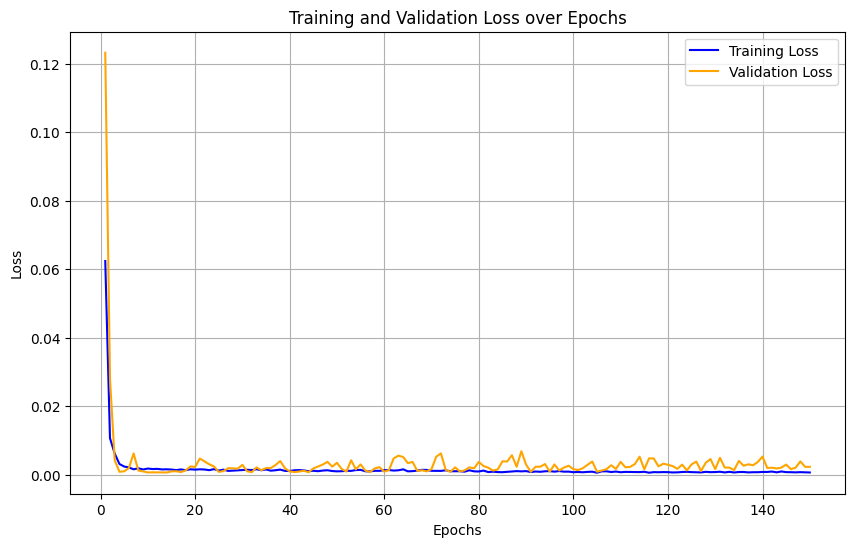

In [46]:
# Training and Validation Loss over epochs
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, training_loss, label='Training Loss', color='blue')
plt.plot(epochs, validation_loss, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

The training loss and MAE are lower than the validation metrics, which is common in machine learning. This could indicate that the model has learned the training data well but might be overfitting if the validation metrics are significantly worse.
If the validation loss and MAE are close to the training metrics, it suggests that the model is generalizing well.
If the validation metrics are much higher than the training metrics, it may be a sign of overfitting, where the model performs well on the training data but poorly on unseen data.

In [37]:
# Make predictions
predictions = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


In [38]:
# Inverse scale the predictions to original values
predictions = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))


In [39]:
# Evaluate the model
mae = mean_absolute_error(y_test_rescaled, predictions)
mse = mean_squared_error(y_test_rescaled, predictions)
r2 = r2_score(y_test_rescaled, predictions)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 745.3263476562503
Mean Squared Error: 566869.7010439953
R-squared: -122.39912984792127


The high MAE and MSE values indicate that the model's predictions are significantly off from the actual values.
The negative R² suggests that the model is not effective at explaining the variability in the data, meaning it may be a poor fit for the problem at hand.
These results imply that we may need to consider improving the model, perhaps by selecting different features, trying a different modeling approach, or tuning hyperparameters.

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


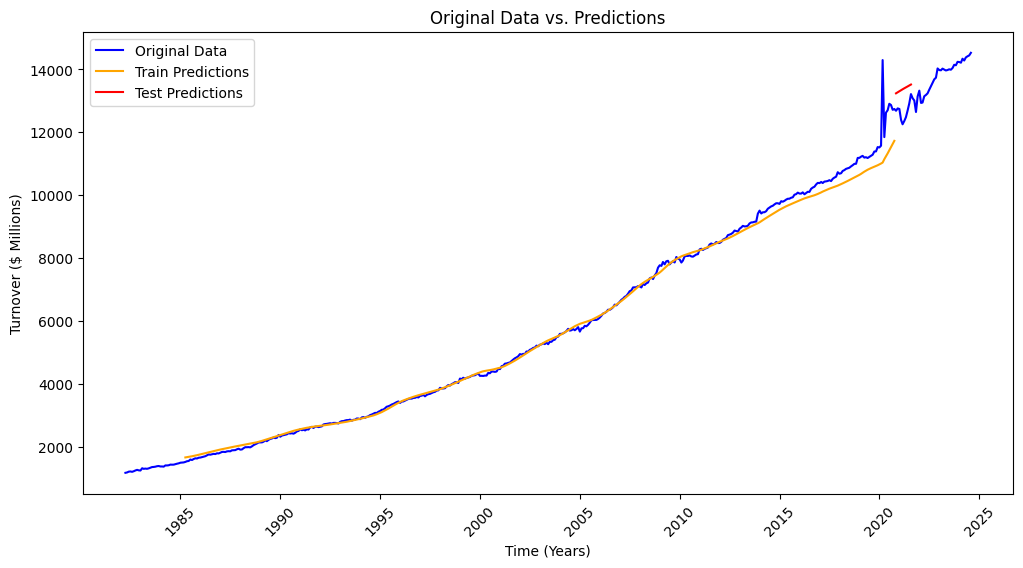

In [30]:
# scaled_values are the normalized data used for training and testing
scaled_values = scaler.transform(df[[target_column]])  # Normalize the original data for plotting

# Prepare predictions for plotting
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions to get them back to original scale
train_predict_rescaled = scaler.inverse_transform(train_predict)
test_predict_rescaled = scaler.inverse_transform(test_predict)

# Prepare the full dataset for original values
original_data = scaler.inverse_transform(scaled_values)

# Create a time index based on the DataFrame's index
time_index = df.index

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(time_index, original_data, label='Original Data', color='blue')
plt.plot(time_index[time_steps:time_steps + len(train_predict_rescaled)], train_predict_rescaled, label='Train Predictions', color='orange')
plt.plot(time_index[time_steps + len(train_predict_rescaled):time_steps + len(train_predict_rescaled) + len(test_predict_rescaled)], test_predict_rescaled, label='Test Predictions', color='red')
plt.legend()
plt.title('Original Data vs. Predictions')
plt.xlabel('Time (Years)')
plt.ylabel('Turnover ($ Millions)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
# Enhancing the MODEL

In [47]:
#Univariate LSTM Model Implementation

# Specify the target column
target_column = 'Seasonally_Food_retailing'

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[[target_column]])

In [48]:
# Create a DataFrame from scaled data for easier date filtering
scaled_data_df = pd.DataFrame(scaled_data, index=df.index, columns=[target_column])

In [49]:
# Specify your desired training and testing date ranges
train_start_date = '1982-04-01'
train_end_date = '2020-10-01'
test_start_date = '2020-11-01'
test_end_date = '2024-08-01'

In [50]:
# Filter the scaled data based on specified date ranges
train_data = scaled_data_df[train_start_date:train_end_date]
test_data = scaled_data_df[test_start_date:test_end_date]

In [51]:
# Create sequences for the training and testing datasets
def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps)])
        y.append(data[i + time_steps, 0])  # Predicting the target column
    return np.array(X), np.array(y)

time_steps = 36  # For example, using the future 36 months
X_train, y_train = create_sequences(train_data.values, time_steps)
X_test, y_test = create_sequences(test_data.values, time_steps)

In [52]:
# Reshape X_train and X_test for LSTM input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

** Model Architecture Enhancements**
Advanced Architectures
Bidirectional LSTMs:

These allow the model to learn from both past (backward states) and future (forward states) sequences.
This is beneficial for capturing patterns that may depend on both directions in the time series.
Stacked LSTMs:

Multiple LSTM layers stacked on top of each other help the model learn more complex features.
Each layer learns different representations, allowing the model to capture hierarchical patterns.


In [53]:
# Build the advanced LSTM model (Bidirectional LSTMs and Stacked LSTMs)

model = keras.Sequential([
    layers.Bidirectional(layers.LSTM(100, return_sequences=True), input_shape=(X_train.shape[1], 1)),
    layers.Dropout(0.2),
    layers.Bidirectional(layers.LSTM(50)),  # Stacked LSTM layer
    layers.Dropout(0.2),
    layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [55]:
# Train the model
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.2)

Epoch 1/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 152ms/step - loss: 0.0375 - mae: 0.1390 - val_loss: 0.0435 - val_mae: 0.2048
Epoch 2/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 0.0057 - mae: 0.0557 - val_loss: 0.0029 - val_mae: 0.0511
Epoch 3/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 147ms/step - loss: 0.0017 - mae: 0.0339 - val_loss: 0.0029 - val_mae: 0.0447
Epoch 4/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - loss: 9.7564e-04 - mae: 0.0213 - val_loss: 0.0013 - val_mae: 0.0320
Epoch 5/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 7.1578e-04 - mae: 0.0184 - val_loss: 0.0010 - val_mae: 0.0253
Epoch 6/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 5.0786e-04 - mae: 0.0161 - val_loss: 0.0010 - val_mae: 0.0143
Epoch 7/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 4.3950e-04 - mae: 0.0137 - val_loss: 9.8588e-04 - val_mae: 0.0136
Epoch 8/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 4.0683e-04 - mae: 0.0136 - val_loss: 8.2631e-04 - val_mae: 0.0167
Epoch 9/150
11/11 ━━━━━━━

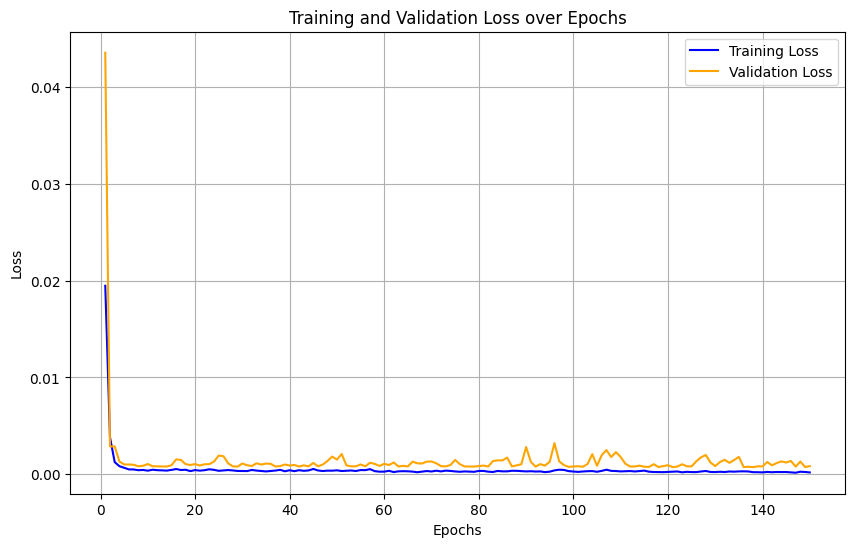

In [56]:
# Training and Validation Loss over epochs
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, training_loss, label='Training Loss', color='blue')
plt.plot(epochs, validation_loss, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [57]:
# Make predictions
predictions = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 773ms/step


In [58]:
# Inverse scale the predictions to original values
predictions = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))


In [59]:
# Evaluate the model
mae = mean_absolute_error(y_test_rescaled, predictions)
mse = mean_squared_error(y_test_rescaled, predictions)
r2 = r2_score(y_test_rescaled, predictions)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 630.0158789062509
Mean Squared Error: 398321.51361787145
R-squared: -28.763514755996894


Overall, the second set of scores indicates a better-performing model compared to the first set. The lower MAE and MSE values, along with a less negative R², suggest that the second model is more accurately capturing the relationship between the features and the target variable. However an R-squared score of -28.76 is still very poor.

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


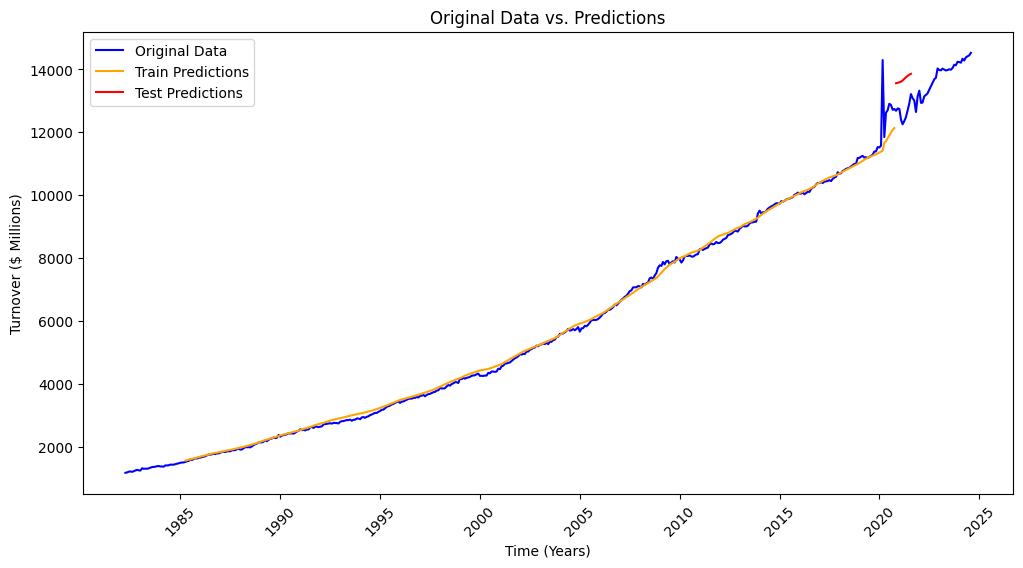

In [60]:
# scaled_values are the normalized data used for training and testing
scaled_values = scaler.transform(df[[target_column]])  # Normalize the original data for plotting

# Prepare predictions for plotting
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions to get them back to original scale
train_predict_rescaled = scaler.inverse_transform(train_predict)
test_predict_rescaled = scaler.inverse_transform(test_predict)

# Prepare the full dataset for original values
original_data = scaler.inverse_transform(scaled_values)

# Create a time index based on the DataFrame's index
time_index = df.index

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(time_index, original_data, label='Original Data', color='blue')
plt.plot(time_index[time_steps:time_steps + len(train_predict_rescaled)], train_predict_rescaled, label='Train Predictions', color='orange')
plt.plot(time_index[time_steps + len(train_predict_rescaled):time_steps + len(train_predict_rescaled) + len(test_predict_rescaled)], test_predict_rescaled, label='Test Predictions', color='red')
plt.legend()
plt.title('Original Data vs. Predictions')
plt.xlabel('Time (Years)')
plt.ylabel('Turnover ($ Millions)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()